# Named entity recognition
Objectives:

- Take 1 thousand random passages from the FIQA-PL corpus.
- Use the lemmatized and sentence split documents (from ex. 5) to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence. E.g. the sentence:
Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych.
should yield the following entries: Kraków, Polska, Stan Zjednoczony.
- Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.
- Apply the NER from SpaCy to identify the named entities in the same set of documents.
- Plot the frequency (histogram) of the identified classes.
- Display 10 most frequent Named Entities for each identified type.
- Display 50 most frequent Named Entities including their count and type.
- Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color. 


## Take 1 thousand random passages from the FIQA-PL corpus.


In [8]:
from datasets import load_dataset 
import pandas as pd
import spacy
from spacy import displacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [9]:
nlp = spacy.load("pl_core_news_sm")

In [10]:
# Load corpus dataset
dataset = load_dataset("clarin-knext/fiqa-pl", "corpus")
df = pd.DataFrame(dataset['corpus'])
df_text = df['text']

In [11]:
# Set indexes
df.head()

,_id,title,text
0,3,,"Nie mówię, że nie podoba mi się też pomysł szk..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...
2,56,,Nigdy nie możesz korzystać z FSA dla indywidua...
3,59,,Samsung stworzył LCD i inne technologie płaski...
4,63,,Oto wymagania SEC: Federalne przepisy dotycząc...


In [12]:
passages = df.sample(n=1000)
fulltext = ' '.join(passages['text'])


## Use the lemmatized and sentence split documents to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence.

In [14]:
ner = pd.DataFrame()

In [15]:
# Function for preprocessing text (lemmatization and sentence split using spaCy)
def preprocess_text(text):
    doc = nlp(text)
    lemmatized_sentences = [
        " ".join([token.lemma_ for token in sent]) for sent in doc.sents
    ]
    return " ".join(lemmatized_sentences)

In [16]:
def identify_named_entities_lemmatized(text):
    doc = nlp(text)
    expressions = []

    current_expression = ""
    for sent in doc.sents:
        for i, token in enumerate(sent):
            # Sprawdź, czy token zaczyna się od wielkiej litery i czy nie jest na początku zdania
            if token.text.istitle() and i > 0 and len(token) > 1:
                # Jeśli mamy już rozpoczętą grupę, dodaj do niej bieżący token
                if current_expression:
                    current_expression += " " + token.lemma_
                else:
                    current_expression = token.lemma_
            # Jeśli token nie jest zapisany wielkimi literami i mamy rozpoczętą grupę, dodaj ją do listy
            elif current_expression:
                # Sprawdź, czy lematy tokenów w grupie są zapisane wielkimi literami
                lemmatized_tokens = [t.lemma_ for t in nlp(current_expression)]
                if all(lemma.istitle() for lemma in lemmatized_tokens):
                    expressions.append(current_expression)
                current_expression = ""

    return expressions

# Przykład użycia
sample_text = "Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych."
result = identify_named_entities_lemmatized(sample_text)
print(f"Identified Lemmatized Expressions: {result}")

Identified Lemmatized Expressions: ['Kraków', 'Polska', 'Stany Zjednoczone']


In [17]:
# Process passages and identify expressions
identified_expressions = []
lemmatized_and_sentence_split_text = preprocess_text(fulltext)
expressions = identify_named_entities_lemmatized(lemmatized_and_sentence_split_text)
identified_expressions.extend(expressions)

# Display identified expressions
print(identified_expressions[:40])

['Quaoar', 'Eris', 'Pluton', 'Neil Degrasse Tyson', 'Cudzoziemcy', 'Social Security Administration', 'Ciebie', 'Ciebie', 'Ciebie', 'Ciebie', 'Ciebie', 'Ciebie', 'Odpowiem', 'Baliga', 'Baliga', 'Rozszerzone', 'Najlepsze', 'Amazona', 'Money', 'Stany Zjednoczone', 'Ciebie', 'Twoją', 'Twoją', 'Adidas', 'Wilson', 'Mikasa', 'Nike', 'Balls', 'Ciebie', 'Roth', 'Amazon', 'Ciebie', 'Fidelity', 'Ameryka', 'Hongkong', 'Lehman', 'Smith', 'Najlepsze', 'Social Security', 'Social Security']


In [18]:
identified_expressions_df = pd.DataFrame(identified_expressions)

In [19]:
identified_expressions_df.head(50)

,0
0,Quaoar
1,Eris
2,Pluton
3,Neil Degrasse Tyson
4,Cudzoziemcy
5,Social Security Administration
6,Ciebie
7,Ciebie
8,Ciebie
9,Ciebie


In [20]:
print("Number od identified expressions: " + str(len(identified_expressions)))

Number od identified expressions: 1355


In [21]:
expression_counts = identified_expressions_df[0].value_counts()

In [22]:
print(expression_counts[:50])

0
Ciebie               51
Roth                 31
Stany Zjednoczone    27
Google               26
Amazon               22
S&P                  21
Europe               17
Chi                  17
Apple                16
Ameryka              16
Twoją                16
Indie                15
Vanguard             14
Twoich               14
Najlepsze            12
Aa3                  11
A2                   11
Europa               11
Facebook             11
Obama                11
Trump                10
Australia             9
Internet              8
Grecja                8
A3                    8
Windows               8
Rozszerzone           8
Stany                 7
Amerykanin            7
Corp                  7
M1                    6
A1                    6
L1                    6
Liz                   6
Yahoo                 5
Visa                  5
M2                    5
Izrael                5
Yelp                  5
S60                   5
Fed                   5
Wells Fargo   

## Apply the NER from SpaCy to identify the named entities in the same set of documents.

In [23]:
# Identification using SpaCy
ner_result = nlp(fulltext)
ners = [(e.text, e.label_, e.start_char, e.end_char) for e in ner_result.ents]

In [24]:
print("Number od identified expressions: " + str(len(ners)))

Number od identified expressions: 2313


In [25]:
ners[:50]

[('azjatycki', 'geogName', 1213, 1222),
 ('Quaoar', 'persName', 1629, 1635),
 ('Eris', 'persName', 1645, 1649),
 ('2000 r.', 'date', 1667, 1674),
 ('IAU', 'orgName', 2091, 2094),
 ('24.', 'date', 2191, 2194),
 ('Neila Degrasse Tysona', 'persName', 2329, 2350),
 ('IAU', 'orgName', 2577, 2580),
 ('IRS', 'orgName', 2619, 2622),
 ('amerykański', 'placeName', 2681, 2692),
 ('Social Security Administration', 'orgName', 2769, 2799),
 ('SSN', 'orgName', 2819, 2822),
 ('Urzędu Skarbowego', 'orgName', 2898, 2915),
 ('IRS', 'orgName', 3147, 3150),
 ('OTC', 'orgName', 4016, 4019),
 ('USA', 'placeName', 8670, 8673),
 ('Baliga', 'orgName', 8674, 8680),
 ('Baliga', 'persName', 8861, 8867),
 ('039', 'orgName', 9124, 9127),
 ('Wealthsimple', 'persName', 11007, 11019),
 ('Couch Potato', 'orgName', 11181, 11193),
 ('Wealthsimple', 'placeName', 11418, 11430),
 ('\u200b\u200blepiej', 'orgName', 11480, 11488),
 ('SE Money', 'orgName', 11581, 11589),
 ('Wealthsimple', 'persName', 11627, 11639),
 ('Stanach Zj

In [26]:
# Compute the frequency of each identified expression
expression_counts = Counter(entity[0] for entity in ners)

In [27]:
# Print 50 results with the largest number of occurrences
top_50_expressions = expression_counts.most_common(50)
for expression, count in top_50_expressions:
    print(f"{expression}: {count} occurrences")

USA: 90 occurrences
IRA: 42 occurrences
Google: 25 occurrences
Amazon: 23 occurrences
Roth IRA: 22 occurrences
ETF: 21 occurrences
Apple: 20 occurrences
Vanguard: 15 occurrences
SEC: 13 occurrences
HSA: 13 occurrences
Stanach Zjednoczonych: 12 occurrences
gdybyś: 12 occurrences
S&P: 12 occurrences
Wielkiej Brytanii: 12 occurrences
amerykańskich: 11 occurrences
Indiach: 10 occurrences
Krótkoterminowy: 9 occurrences
Trump: 9 occurrences
jakbyś: 8 occurrences
Stany Zjednoczone: 8 occurrences
amerykańskie: 8 occurrences
Facebook: 8 occurrences
Europie: 8 occurrences
HST: 8 occurrences
Ameryka: 7 occurrences
CC: 7 occurrences
MBS: 7 occurrences
Kanadzie: 7 occurrences
IPO: 7 occurrences
Obama: 7 occurrences
Trumpa: 7 occurrences
NYCERS: 7 occurrences
Australii: 6 occurrences
Stanów Zjednoczonych: 6 occurrences
RRSP: 6 occurrences
2011 r.: 6 occurrences
Chiny: 6 occurrences
Stanów Zjednoczonych”: 6 occurrences
AGI: 6 occurrences
EBC: 6 occurrences
IRS: 5 occurrences
amerykański: 5 occurrence

In [28]:
# Compute the frequency of each identified class
classes_ner_counts = Counter(entity[1] for entity in ners)
for ner_type, count in classes_ner_counts.items():
    print(ner_type, count)

geogName 106
persName 626
date 196
orgName 838
placeName 543
time 4


## Plot the frequency (histogram) of the identified classes.


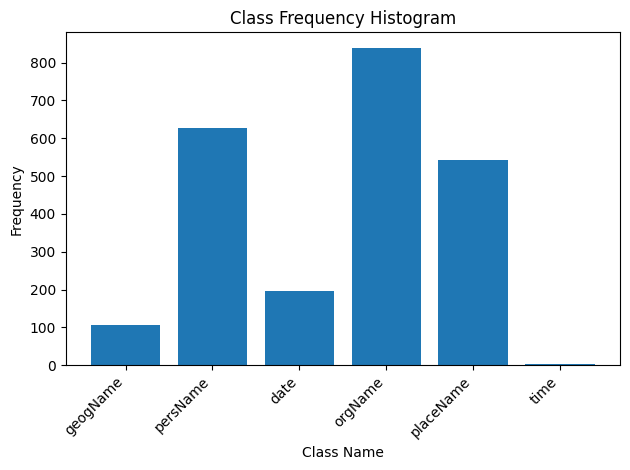

In [29]:
# Wygeneruj histogram
plt.bar(classes_ner_counts.keys(), classes_ner_counts.values())
plt.xlabel("Class Name")
plt.ylabel("Frequency")
plt.title("Class Frequency Histogram")
plt.xticks(rotation=45, ha="right")  # Obróć etykiety osi X, aby były czytelne
plt.tight_layout()  # Dostosuj układ, aby uniknąć przecięć etykiet
plt.show()

## Display 10 most frequent Named Entities for each identified type.


In [30]:
# Initialize defaultdict to store NER entities for each type
ner_type_entities = defaultdict(list)

# Iterate through NER entities
for entity in ners:
    ner_type = entity[1]  # NER entity type
    ner_text = entity[0]  # NER entity text
    ner_type_entities[ner_type].append(ner_text)

In [31]:
# Display the top 10 Named Entities for each NER type
for ner_type, count in classes_ner_counts.items():
    print(f"\nTop 10 Named Entities for {ner_type}:")
    entities_counter = Counter(ner_type_entities[ner_type])
    for entity, entity_count in entities_counter.most_common(10):
        print(f"{entity}: {entity_count} occurrences")


Top 10 Named Entities for geogName:
Europie: 8 occurrences
Azji: 4 occurrences
europejskich: 4 occurrences
Aa1: 3 occurrences
Home Depot: 3 occurrences
Europy: 3 occurrences
NASDAQ: 3 occurrences
Afryki: 2 occurrences
Reddicie: 2 occurrences
McDonald's: 2 occurrences

Top 10 Named Entities for persName:
Amazon: 23 occurrences
Vanguard: 13 occurrences
gdybyś: 12 occurrences
Krótkoterminowy: 9 occurrences
jakbyś: 8 occurrences
Trump: 8 occurrences
Obama: 7 occurrences
Trumpa: 7 occurrences
Fidelity: 5 occurrences
Gdybyś: 5 occurrences

Top 10 Named Entities for date:
2011 r.: 6 occurrences
marcu: 5 occurrences
1956 r.: 5 occurrences
2008 roku: 4 occurrences
czerwcu: 4 occurrences
2009: 3 occurrences
2011 roku: 3 occurrences
1984 roku: 3 occurrences
2010: 3 occurrences
2016: 3 occurrences

Top 10 Named Entities for orgName:
IRA: 42 occurrences
Google: 23 occurrences
Roth IRA: 22 occurrences
ETF: 21 occurrences
Apple: 19 occurrences
SEC: 13 occurrences
HSA: 13 occurrences
S&P: 12 occurren

In [32]:
nlp.explain('persName')

AttributeError: 'Polish' object has no attribute 'explain'

## Display 50 most frequent Named Entities including their count and type.

In [33]:
# Utwórz słownik zliczający wystąpienia jednostek nazwanych i ich typy
entity_counter = Counter(entity[0] for entity in ners)
entity_types = {entity[0]: entity[1] for entity in ners}

# Wyświetl 50 najczęściej występujących jednostek
most_common_entities = entity_counter.most_common(50)
for entity, count in most_common_entities:
    entity_type = entity_types.get(entity)
    print(f"{entity}, {count}, {entity_type}")

USA, 90, placeName
IRA, 42, orgName
Google, 25, orgName
Amazon, 23, persName
Roth IRA, 22, orgName
ETF, 21, orgName
Apple, 20, orgName
Vanguard, 15, persName
SEC, 13, orgName
HSA, 13, orgName
Stanach Zjednoczonych, 12, placeName
gdybyś, 12, persName
S&P, 12, orgName
Wielkiej Brytanii, 12, placeName
amerykańskich, 11, placeName
Indiach, 10, placeName
Krótkoterminowy, 9, persName
Trump, 9, persName
jakbyś, 8, persName
Stany Zjednoczone, 8, placeName
amerykańskie, 8, placeName
Facebook, 8, placeName
Europie, 8, geogName
HST, 8, orgName
Ameryka, 7, placeName
CC, 7, orgName
MBS, 7, orgName
Kanadzie, 7, placeName
IPO, 7, orgName
Obama, 7, persName
Trumpa, 7, persName
NYCERS, 7, orgName
Australii, 6, placeName
Stanów Zjednoczonych, 6, placeName
RRSP, 6, orgName
2011 r., 6, date
Chiny, 6, placeName
Stanów Zjednoczonych”, 6, orgName
AGI, 6, orgName
EBC, 6, orgName
IRS, 5, orgName
amerykański, 5, placeName
Lyft, 5, persName
Fidelity, 5, persName
Amerykanie, 5, placeName
Medicare, 5, geogName
Gdy

## Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color.

In [36]:
# Part of the text to display 
fragment_to_analyze = fulltext[:2200]
doc = nlp(fragment_to_analyze)
displacy.render(doc, style="ent", jupyter=True)